In [15]:
import pandas as pd

food_consumption = pd.read_csv('Downloads/food_consumption.csv')

be_con = food_consumption[food_consumption['country'] == 'Belgium']
usa_con = food_consumption[food_consumption['country'] == 'USA']

In [14]:
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [17]:
import numpy as np

np.mean(be_con['consumption'])
np.median(be_con['consumption'])

np.mean(usa_con['consumption'])
np.median(usa_con['consumption'])

14.58

In [23]:
be_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

be_usa.groupby('country')['consumption'].agg([np.mean, np.median])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


In [27]:
rice_cons = food_consumption[food_consumption['food_category'] == 'rice']

rice_cons.groupby('country')['co2_emission'].agg([np.mean, np.median])

,mean,median
country,,
Albania,9.96,9.96
Algeria,3.80,3.80
Angola,10.39,10.39
Argentina,11.22,11.22
Armenia,4.07,4.07
...,...,...
Uruguay,14.72,14.72
Venezuela,29.93,29.93
Vietnam,184.99,184.99


# Measures of spread

## Quartile, Quintile, and Deciles

In [31]:
np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1.0])
np.quantile(food_consumption['co2_emission'], [0,0.2,0.4,0.6,0.8, 1.0])
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

In [33]:
food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


<Axes: >

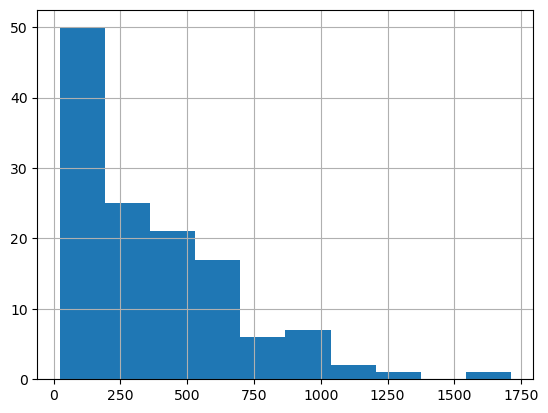

In [36]:
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()

<Axes: >

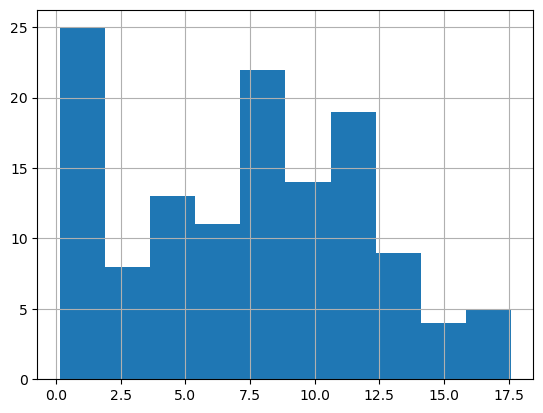

In [38]:
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()

In [41]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [47]:
## Quantiles
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)

iqr = q3-q1

## Lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 - 1.5 * iqr

## SUbset emissions to find outliers

outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
outliers

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [54]:
emissions_by_country.shape[0]

130

# Discrete distributions

<Axes: >

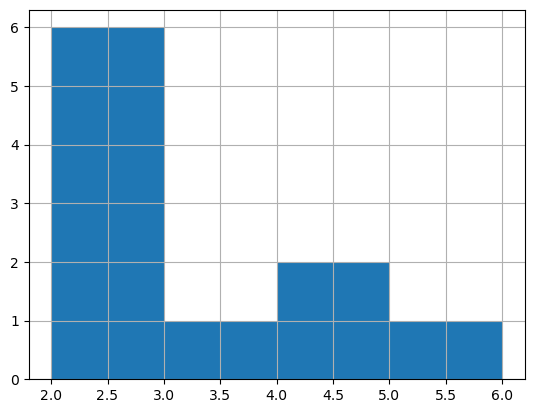

In [4]:
## Creating a probability distribution

import pandas as pd
import numpy as np
rest_grps = pd.read_csv('Downloads/restaurant_groups.csv')

rest_grps['group_size'].hist(bins = np.linspace(2,6,5))

In [6]:
size_dist = rest_grps['group_size'].value_counts() / rest_grps.shape[0]
size_dist = size_dist.reset_index()

size_dist.columns = ['group_size', 'prob']

In [8]:
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
expected_value

2.9000000000000004

In [9]:
groups_4_more = size_dist[size_dist['group_size'] >= 4]

probs_4_more = np.sum(groups_4_more['prob'])
probs_4_more

0.30000000000000004

## Data Backups

In [14]:
min_time = 0
max_time = 30

from scipy.stats import uniform

prob_less_5 = uniform.cdf(5, min_time, max_time)
prob_less_5

prob_gr_5 = 1 - uniform.cdf(5, min_time, max_time)
prob_gr_5

0.8333333333333334

In [17]:
prob_10_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
prob_10_20

0.3333333333333333

(array([ 97., 118., 111.,  91.,  83., 106., 106., 101.,  85., 102.]),
 array([ 0.06222649,  3.05509611,  6.04796574,  9.04083537, 12.03370499,
        15.02657462, 18.01944425, 21.01231387, 24.0051835 , 26.99805313,
        29.99092275]),
 <BarContainer object of 10 artists>)

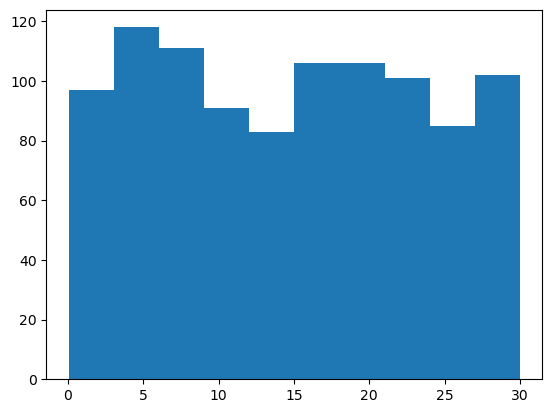

In [22]:
np.random.seed(334)

from scipy.stats import uniform
import matplotlib.pyplot as plt

wait_times = uniform.rvs(0,30, size = 1000)

plt.hist(wait_times)


## The Binomial distribution

In [28]:
from scipy.stats import binom

np.random.seed(10)

print(binom.rvs(1, 0.3, size = 1))

[1]


In [29]:
print(binom.rvs(3, 0.3, size = 1))

[0]


In [33]:
np.random.seed(10)
deals = print(binom.rvs(3, 0.3, size = 52))
print(np.mean(deals))


[1 0 1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0
 2 0 1 1 2 0 2 1 1 0 2 0 0 1 0]


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [37]:
prob_3 = binom.pmf(3, 3, 0.3)

prob_3

prob_less_equal_1 = binom.cdf(1, 3, 0.3)
prob_less_equal_1

prob_gr_1 = 1- prob_less_equal_1
prob_gr_1

0.21599999999999997

In [39]:
win_30pct = 3 * 0.3

win_25pct = 3 * 0.25

win_35pct = 3 * 0.35
win_35pct

1.0499999999999998

In [45]:
from scipy.stats import norm

prob_less_7500 = norm.cdf(7500, 5000, 2000)
prob_less_7500

prob_more_1000 = 1- norm.cdf(1000, 5000, 2000)
prob_more_1000

prob_3000_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
prob_3000_7000

pct_25 = norm.ppf(0.25, 5000, 2000)
pct_25

3651.0204996078364

(array([5., 0., 2., 7., 9., 6., 5., 1., 0., 1.]),
 array([  457.54851795,  1636.9183237 ,  2816.28812945,  3995.65793519,
         5175.02774094,  6354.39754669,  7533.76735244,  8713.13715819,
         9892.50696394, 11071.87676969, 12251.24657544]),
 <BarContainer object of 10 artists>)

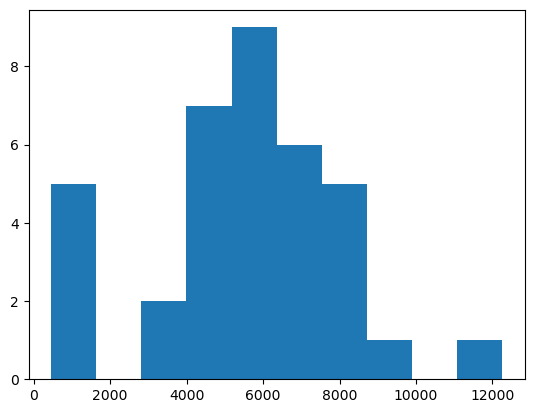

In [48]:
## Simulating sales under new market conditions

new_mean = 5000 * 1.2
new_sd = 2000 * 1.3

new_sales = norm.rvs(new_mean, new_sd, size = 36)
new_sales

plt.hist(new_sales)

In [50]:
amir_deals = pd.read_csv('Downloads/amir_deals.csv')

amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


<Axes: >

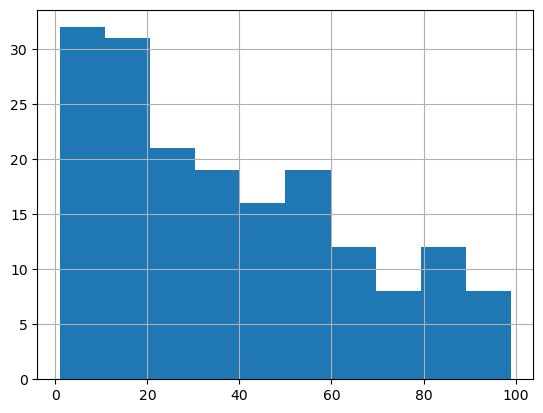

In [51]:
amir_deals['num_users'].hist()


In [54]:
np.random.seed(20)

samp_20 = amir_deals['num_users'].sample(20, replace = True)

np.mean(samp_20)

51.5

<Axes: >

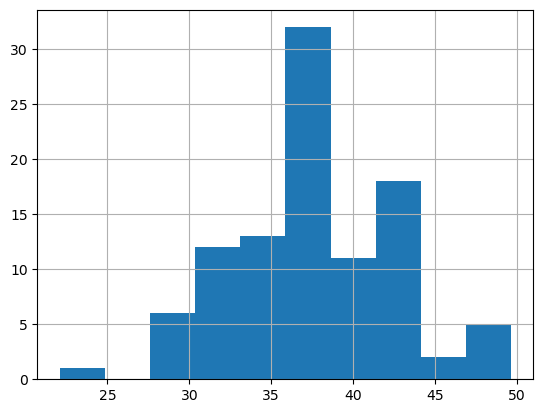

In [59]:
sample_means = []

for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20, replace = True)
    mean_samp_20 = np.mean(samp_20)
    
    sample_means.append(mean_samp_20)
    
sample_mean_series = pd.Series(sample_means)
sample_mean_series.hist()

In [65]:
all_deals = pd.read_csv('Downloads/all_deals.csv')

np.random.seed(321)

sample_means = []

for i in range(30):
    samp_20 = all_deals['num_users'].sample(20, replace = True)
    samp20_mean = np.mean(samp_20)
    sample_means.append(samp20_mean)
    
print(np.mean(sample_means))

print(np.mean(all_deals['num_users']))

38.31333333333332
37.23919226393629


In [73]:
from scipy.stats import poisson

prob_5 = poisson.pmf(5, 4)
print(prob_5)

prob_coworker = poisson.pmf(5,5.5)
print(prob_coworker)

prob_2_less = poisson.cdf(2, 4)
print(prob_2_less)

prob_10_more = 1 - poisson.cdf(10, 4)
print(prob_10_more)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


In [77]:
from scipy.stats import expon

print(expon.cdf(1, scale = 2.5))

print(1 - expon.cdf(4, scale = 2.5))

print(expon.cdf(3, scale = 2.5) - expon.cdf(4, scale = 2.5))

0.3296799539643607
0.20189651799465536
-0.09929769391754684


## Correlation and experimentatl design


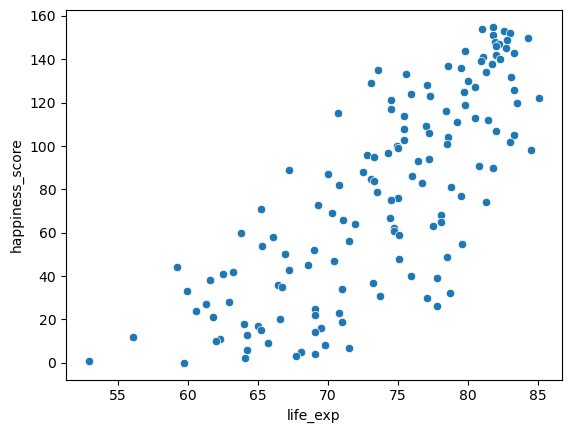

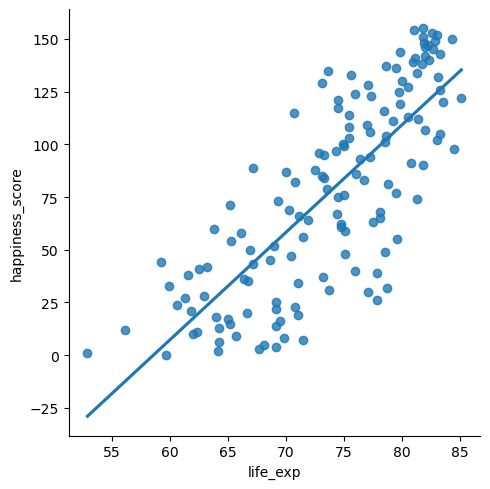

In [82]:
import seaborn as sns

world_happiness = pd.read_csv("Downloads/world_happiness.csv", index_col = 0)

sns.scatterplot(x = 'life_exp', y = 'happiness_score', data = world_happiness)

sns.lmplot(x= 'life_exp', y = 'happiness_score', data = world_happiness, ci = None)

In [84]:
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

0.7802249053272062


## Correlation Caveats


<Axes: xlabel='gdp_per_cap', ylabel='happiness_score'>

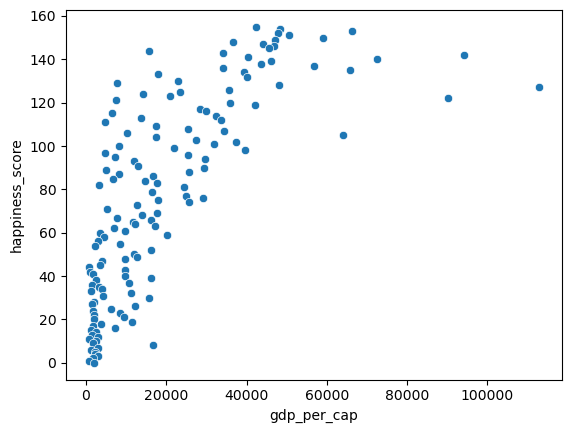

In [93]:
sns.scatterplot(x = 'gdp_per_cap', y = 'happiness_score', data = world_happiness)

In [89]:
corr = world_happiness['life_exp'].corr(world_happiness['gdp_per_cap'])
print(corr)

0.7019547642148013


<Axes: xlabel='happiness_score', ylabel='log_gdp_per_cap'>

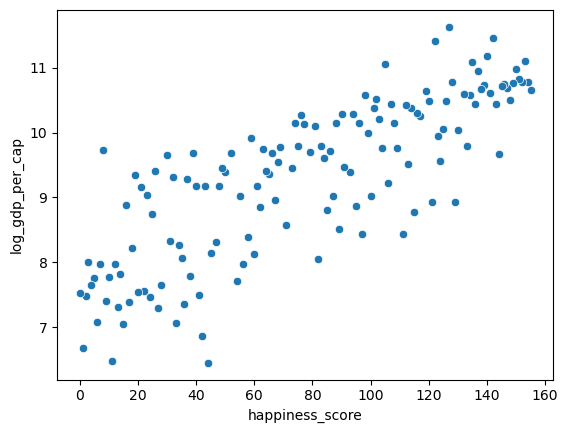

In [92]:
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

sns.scatterplot(x = 'happiness_score', y = 'log_gdp_per_cap', data = world_happiness)

In [95]:
corr = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
corr

0.8043146004918288

<Axes: xlabel='grams_sugar_per_day', ylabel='happiness_score'>

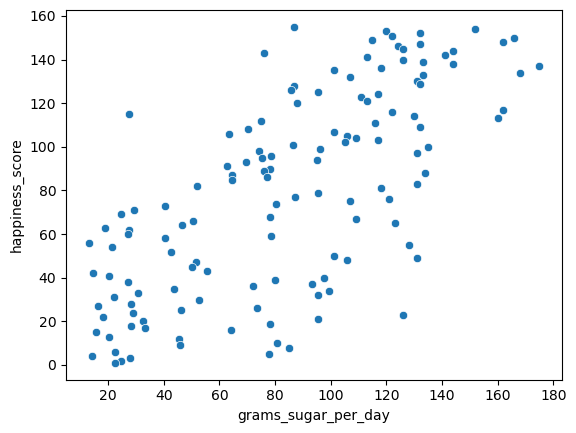

In [97]:
world_happiness = pd.read_csv('Downloads/world_happiness_full.csv')

sns.scatterplot(x = 'grams_sugar_per_day', y = 'happiness_score', data = world_happiness)

In [98]:
corr = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
corr

0.6939100021829633